In [54]:
# Import external modules
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# Import internal modules
from data.clean_data import df
from utils.helpers import prepare_eurusd_data
from utils.helpers import train_test_split

In [56]:
df.head()

,datetime,bid_open,bid_high,bid_low,bid_close,ask_open,ask_high,ask_low,ask_close
96,2020-01-02 00:00:00,1.12184,1.12186,1.12156,1.12157,1.12198,1.12199,1.12167,1.12168
97,2020-01-02 00:15:00,1.12154,1.12164,1.12151,1.12155,1.12168,1.12177,1.12165,1.12169
98,2020-01-02 00:30:00,1.12157,1.12169,1.12152,1.12167,1.12169,1.12182,1.12164,1.12181
99,2020-01-02 00:45:00,1.12169,1.12183,1.12169,1.12178,1.12181,1.12197,1.12181,1.12191
100,2020-01-02 01:00:00,1.12177,1.12225,1.12176,1.12221,1.12190,1.12238,1.12188,1.12234


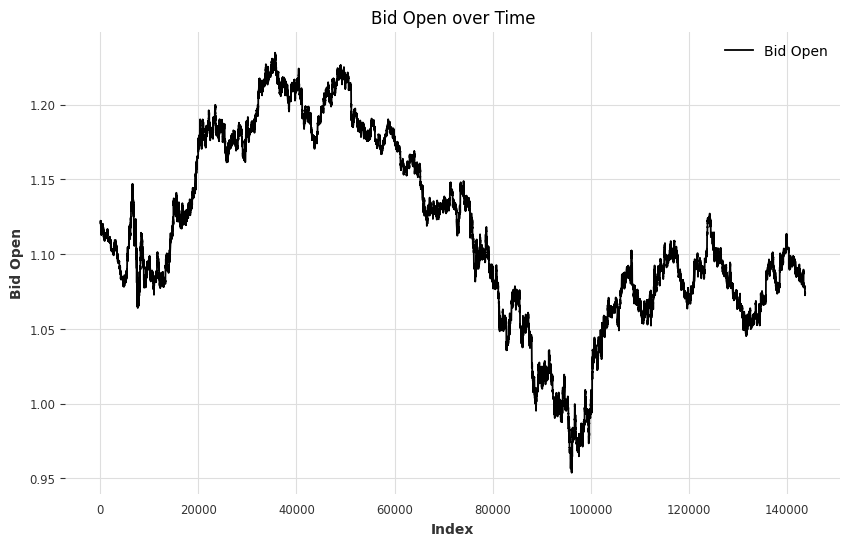

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot 'bid_open' as a line plot
plt.figure(figsize=(10, 6))
# Plotting index instead of datetime, since Nan removal leads to inconsistent spacing
plt.plot(df.index, df['bid_open'], label='Bid Open', color='black')
plt.title('Bid Open over Time')
plt.xlabel('Index')
plt.ylabel('Bid Open')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
# Prepare EURUSD data and make suitable subselection
series, target_series, cov_series, dates = prepare_eurusd_data(data=df, n=1000)

c:\Users\Paul\Desktop\Repositories\Time-Series-Ensembles\project\utils\helpers.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('datetime', axis=1, inplace=True)


<Axes: xlabel='time'>

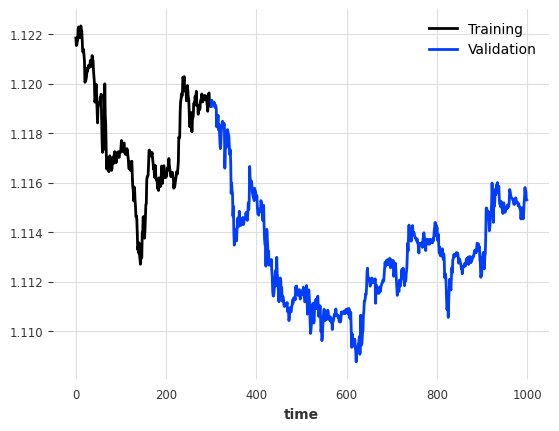

In [59]:
train, val = train_test_split(target_series)

# Plotting prepared univariate series (subselection)
train.plot(label='Training')
val.plot(label='Validation')


In [60]:
# External Modules
from darts import TimeSeries
from darts.models import XGBModel, NaiveDrift, NaiveMovingAverage, AutoARIMA, RandomForest
import pandas as pd

# Naive models
model_naive = NaiveMovingAverage(input_chunk_length=1)
model_naive_drift = NaiveDrift()

# Not-so naive models
model_XGB = XGBModel(lags=12)
model_RF = RandomForest(lags=12)
model_AutoARIMA = AutoARIMA()

models = [model_naive, model_naive_drift, model_XGB]

In [61]:
import pandas as pd

def hfc_models(models, target_series):
    
    #
    predictions = {}

    for model in models:
        historical_fc = model.historical_forecasts(
            target_series,
            start=0.3,
            forecast_horizon=1,
            verbose=True,
            show_warnings=False
        )

        # Tranbsform darts' TimeSeries to list of values
        prediction_values = list(historical_fc.values().flatten())

        # Remove last element of historical forecast, since there is no target value for comparison
        prediction_values.pop()
        
        # Using the model's name as the column label
        model_name = type(model).__name__
        predictions[model_name] = prediction_values

    # Creating a DataFrame from the predictions dictionary
    predictions_df = pd.DataFrame(predictions)

    return predictions_df

# Example usage
predictions_df = hfc_models(models, target_series)
print(predictions_df)



  0%|          | 0/701 [00:00<?, ?it/s]

  0%|          | 0/701 [00:00<?, ?it/s]

  0%|          | 0/701 [00:00<?, ?it/s]

     NaiveMovingAverage  NaiveDrift  XGBModel
0               1.11913    1.119121  1.119230
1               1.11908    1.119071  1.119102
2               1.11908    1.119071  1.119102
3               1.11933    1.119322  1.119353
4               1.11925    1.119241  1.119266
..                  ...         ...       ...
695             1.11517    1.115163  1.115072
696             1.11542    1.115414  1.115322
697             1.11580    1.115794  1.115588
698             1.11559    1.115584  1.115381
699             1.11563    1.115624  1.115478

[700 rows x 3 columns]


In [62]:
val

<TimeSeries (DataArray) (time: 700, component: 1, sample: 1)>
array([[[1.11908]],

       [[1.11933]],

       [[1.11925]],

       [[1.11923]],

       [[1.11917]],

       [[1.11917]],

       [[1.11925]],

       [[1.11921]],

       [[1.11904]],

       [[1.11914]],

...

       [[1.11474]],

       [[1.11453]],

       [[1.1147 ]],

       [[1.11517]],

       [[1.11542]],

       [[1.1158 ]],

       [[1.11559]],

       [[1.11563]],

       [[1.11533]],

       [[1.1153 ]]])
Coordinates:
  * time       (time) int64 300 301 302 303 304 305 ... 994 995 996 997 998 999
  * component  (component) object 'bid_open'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
def timeseries_to_array(timeseries, pop=True):
    """
    Convert a dictionary of time series data into a flattened array.

    Parameters:
    - timeseries (dict): A dictionary containing time series data.
    - pop (bool): If True, pop the last element to match the length of the validation set.

    Returns:
    - array (list): A flattened list representing the time series data.
    """
    
    # Convert to list
    values = list(timeseries.flatten().values())  # Flatten is not necessary since values are already lists

    # Pop last element to match length of validation/test set
    if pop:
        values.pop()

    return values

In [63]:
from utils.helpers import timeseries_to_array

target_values = timeseries_to_array(val, pop=False)
target_values

[array([1.11908]),
 array([1.11933]),
 array([1.11925]),
 array([1.11923]),
 array([1.11917]),
 array([1.11917]),
 array([1.11925]),
 array([1.11921]),
 array([1.11904]),
 array([1.11914]),
 array([1.11909]),
 array([1.11899]),
 array([1.11825]),
 array([1.11868]),
 array([1.11849]),
 array([1.11872]),
 array([1.11813]),
 array([1.11834]),
 array([1.11809]),
 array([1.11767]),
 array([1.11737]),
 array([1.11751]),
 array([1.118]),
 array([1.11827]),
 array([1.11841]),
 array([1.11848]),
 array([1.11824]),
 array([1.11821]),
 array([1.1184]),
 array([1.11834]),
 array([1.11658]),
 array([1.11731]),
 array([1.11756]),
 array([1.11741]),
 array([1.11783]),
 array([1.11808]),
 array([1.11814]),
 array([1.11804]),
 array([1.11793]),
 array([1.11785]),
 array([1.11743]),
 array([1.11713]),
 array([1.11733]),
 array([1.11676]),
 array([1.11556]),
 array([1.11598]),
 array([1.11569]),
 array([1.11556]),
 array([1.11464]),
 array([1.11504]),
 array([1.11392]),
 array([1.11347]),
 array([1.1141]